In [1]:
import os.path

import numpy as np
import matplotlib.pyplot as plt
import shutil

from typing import List, Tuple

In [2]:
def apply_homogeneous_transformation_matrix_to_vector(homogeneous_matrix: np.ndarray, vector: np.ndarray) -> np.ndarray:
    assert homogeneous_matrix.shape == (4, 4)
    assert vector.shape == (3, )

    extended_vector = np.hstack((vector, np.array([1], dtype=float)))
    transformed_extended_vector = homogeneous_matrix @ extended_vector

    transformed_vector = transformed_extended_vector[:3]
    return transformed_vector


def multiply_homogeneous_transformation_matrices(
    homogeneous_matrix_1: np.ndarray, homogeneous_matrix_2: np.ndarray
) -> np.ndarray:
    assert homogeneous_matrix_1.shape == (4, 4)
    assert homogeneous_matrix_2.shape == (4, 4)

    return homogeneous_matrix_1 @ homogeneous_matrix_2

def invert_homogeneous_transformation_matrix(homogeneous_matrix: np.ndarray) -> np.ndarray:
    assert homogeneous_matrix.shape == (4, 4)

    inverted_homogeneous_matrix = np.identity(4)
    inverted_homogeneous_matrix[:3, :3] = homogeneous_matrix[:3, :3].transpose()
    inverted_homogeneous_matrix[:3, 3] = -homogeneous_matrix[:3, :3].transpose() @ homogeneous_matrix[:3, 3]

    return inverted_homogeneous_matrix

In [3]:
def get_plot() -> Tuple[plt.figure, plt.axes]:
    fig, ax = plt.subplots()
    clear_and_prepare_plot(ax)
    return fig, ax


def clear_and_prepare_plot(ax) -> None:
    ax.cla()
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-7, 7)
    ax.set_ylim(-3.5, 4.5)
    ax.grid(True)
    ax.set_xlabel('x position')
    ax.set_ylabel('y position')


def plot_vector(ax: plt.axes, start: np.ndarray, end: np.ndarray, color: str = None, opacity: float = 1) -> None:
    assert start.shape == (3, )
    assert end.shape == (3, )
    ax.plot(
        (start[0], end[0]),
        (start[1], end[1]),
        color=color,
        alpha=opacity
    )

def plot_coordinate_system(ax: plt.axes, pose: np.ndarray) -> None:
    # variable names and calculations are optimized for clarity, not for brevity...

    local_start_of_base_vectors = np.array([0, 0, 0], dtype=float)
    local_end_of_x_unit_vector = np.array([1, 0, 0], dtype=float)
    local_end_of_y_unit_vector = np.array([0, 1, 0], dtype=float)
    local_end_of_z_unit_vector = np.array([0, 0, 1], dtype=float)

    global_start_of_base_vectors = apply_homogeneous_transformation_matrix_to_vector(
        pose, local_start_of_base_vectors
    )
    global_end_of_x_unit_vector = apply_homogeneous_transformation_matrix_to_vector(
        pose, local_end_of_x_unit_vector
    )
    global_end_of_y_unit_vector = apply_homogeneous_transformation_matrix_to_vector(
        pose, local_end_of_y_unit_vector
    )
    global_end_of_z_unit_vector = apply_homogeneous_transformation_matrix_to_vector(
        pose, local_end_of_z_unit_vector
    )

    plot_vector(ax, global_start_of_base_vectors, global_end_of_x_unit_vector, 'red')
    plot_vector(ax, global_start_of_base_vectors, global_end_of_y_unit_vector, 'green')
    plot_vector(ax, global_start_of_base_vectors, global_end_of_z_unit_vector, 'blue')


In [4]:
bcs_T_root = np.array([
    [0.5*3**0.5, -0.5, 0, 3],
    [0.5, 0.5*3**0.5, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
], dtype=float)
print(bcs_T_root)

[[ 0.8660254 -0.5        0.         3.       ]
 [ 0.5        0.8660254  0.         0.       ]
 [ 0.         0.         1.         0.       ]
 [ 0.         0.         0.         1.       ]]


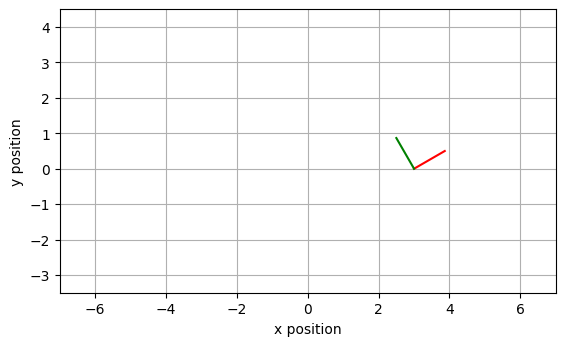

In [5]:
fig, ax = get_plot()
plot_coordinate_system(ax, bcs_T_root)

In [6]:
bcs_T_target = np.array([
    [0, -1, 0, 3+3**0.5],
    [1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
], dtype=float)
print(bcs_T_target)

[[ 0.         -1.          0.          4.73205081]
 [ 1.          0.          0.          1.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


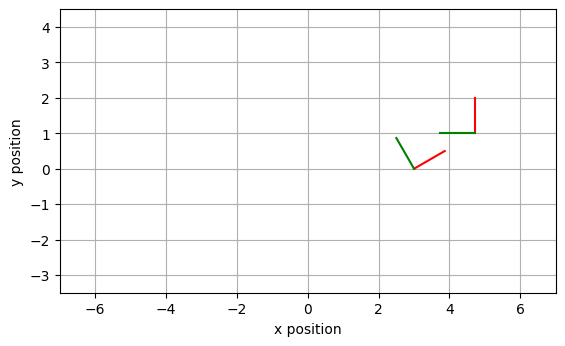

In [7]:
fig, ax = get_plot()
plot_coordinate_system(ax, bcs_T_root)
plot_coordinate_system(ax, bcs_T_target)

In [8]:
root_T_target = invert_homogeneous_transformation_matrix(bcs_T_root) @ bcs_T_target
print(root_T_target)

[[ 5.00000000e-01 -8.66025404e-01  0.00000000e+00  2.00000000e+00]
 [ 8.66025404e-01  5.00000000e-01  0.00000000e+00  2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [9]:
target_T_root = invert_homogeneous_transformation_matrix(root_T_target)
print(target_T_root)

[[ 0.5         0.8660254   0.         -1.        ]
 [-0.8660254   0.5         0.          1.73205081]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


In [10]:
 invert_homogeneous_transformation_matrix(bcs_T_root)

array([[ 0.8660254 ,  0.5       ,  0.        , -2.59807621],
       [-0.5       ,  0.8660254 ,  0.        ,  1.5       ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [11]:
T = np.array([
    [np.cos(60/180*np.pi), -np.sin(60/180*np.pi), 0, 0],
    [np.sin(60/180*np.pi), np.cos(60/180*np.pi), 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
], dtype=float)
print(T)

[[ 0.5       -0.8660254  0.         0.       ]
 [ 0.8660254  0.5        0.         0.       ]
 [ 0.         0.         1.         0.       ]
 [ 0.         0.         0.         1.       ]]


In [12]:
bcs_T_trans_l = T @ bcs_T_root
print(bcs_T_trans_l)

[[ 1.11022302e-16 -1.00000000e+00  0.00000000e+00  1.50000000e+00]
 [ 1.00000000e+00  9.61481343e-17  0.00000000e+00  2.59807621e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


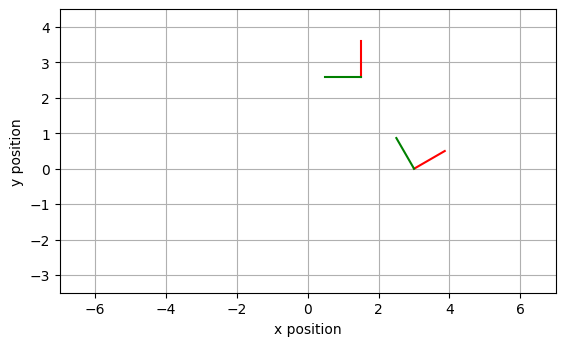

In [13]:
fig, ax = get_plot()
plot_coordinate_system(ax, bcs_T_root)
plot_coordinate_system(ax, bcs_T_trans_l)

In [14]:
bcs_T_trans_r = bcs_T_root @ T
print(bcs_T_trans_r)

[[ 1.11022302e-16 -1.00000000e+00  0.00000000e+00  3.00000000e+00]
 [ 1.00000000e+00  9.61481343e-17  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


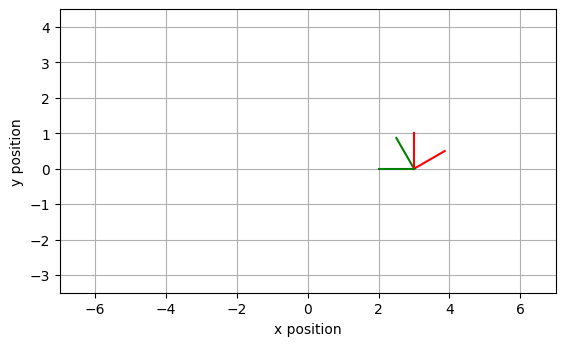

In [15]:
fig, ax = get_plot()
plot_coordinate_system(ax, bcs_T_root)
plot_coordinate_system(ax, bcs_T_trans_r)